### Script is designed to identify the most represented genus or other taxonomic rank among the metagenome samples
Input files are the output of kraken-report <br>
Output is the boxplot and a table <br>
You can change taxon rank and filtering level

In [16]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import glob

In [6]:
# choose taxanomic rank
# you can choose: (U)nclassified, (D)omain, (K)ingdom, (P)hylum, (C)lass, (O)rder, (F)amily, (G)enus, or (S)pecies.
rank = 'G'
# choose minimum reads threshhold
minreads = 10000
# choose number of needed top genus or other taxanomic groups
numb = 10

In [7]:
# You path to folders with kraken outputs files
pathD = os.path.abspath(os.path.dirname('./input/BGI_Kraken2_1908/')) 
# You can define needed file prefix (for example, 'lab*')
flist = [os.path.basename(x) for x in glob.glob(pathD + '/lab*')]

In [21]:
# Make a table with most represented taxanomic groups
COLUMN_NAMES = ['smpl','perc', 'rn1', 'rn2', 'type', 'id', 'name']
data = pd.DataFrame(columns=COLUMN_NAMES)

for smpl in flist:
    tax = pd.read_csv(pathD + '/' + str(smpl), sep='\t', 
                  names=["perc", "rn1", "rn2", 'type','id', "name"])
    taxU = tax[tax['type'] == rank]
    taxU = taxU[taxU['rn1'] >= minreads].sort_values(by=['rn1'], ascending=False)
    taxU = taxU.assign(smpl=smpl[6:23])
    data = data.append(taxU)

data2 = data.groupby(by=["name"]).median().sort_values(by=['perc'], ascending=False)
data3 = data2.head(numb)

data3.to_csv('results/Rank_'+str(rank)+'_STAT.csv')
data3

,perc
name,
Bacteroides,9.235
Phocaeicola,5.110
Alistipes,2.210
Faecalibacterium,1.870
Dhillonvirus,1.415
Prevotella,1.260
Parabacteroides,0.950
Jiaodavirus,0.800
Roseburia,0.730


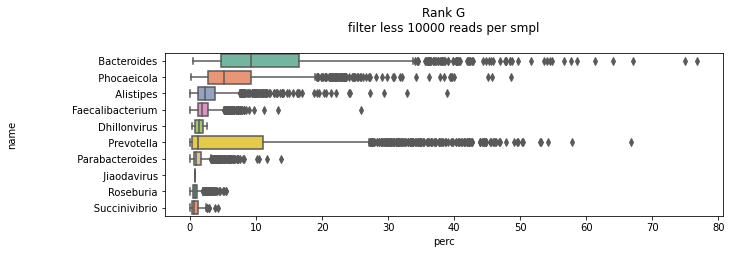

In [18]:
# Make a boxplot with most represented taxanomic groups
data4 = data3.reset_index()
data5 = data[data['name'].isin(data4['name'])]

fig, ax = plt.subplots(figsize=(10, 3))
ax = sns.boxplot(x="perc", y="name", order = data3.index, data=data5, orient="h", palette="Set2")

plt.title("Rank "+str(rank)+'\n'+'filter less '+str(minreads)+' reads per smpl'+'\n')
plt.savefig('results/Rank_'+str(rank)+'.png', dpi=400)